In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Python\Sample - Superstore.csv", encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df = df.sort_values('Order Date')

In [16]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [17]:
df.dropna(inplace=True)

In [18]:
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()
daily_sales.columns = ['ds', 'y']

In [19]:
daily_sales.head()

,ds,y
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,4407.100
4,2014-01-07,87.158


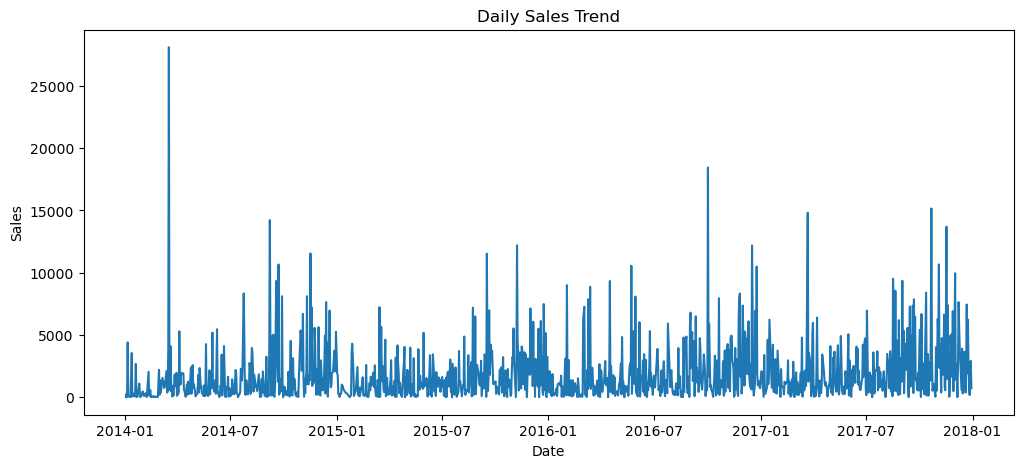

In [20]:
plt.figure(figsize=(12,5))
plt.plot(daily_sales['ds'], daily_sales['y'])
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

In [21]:
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year
monthly_sales = df.groupby(['Year','Month'])['Sales'].sum().reset_index()

In [22]:
category_sales = df.groupby('Category')['Sales'].sum().reset_index()

In [27]:
from prophet import Prophet
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)

In [28]:
model.fit(daily_sales)

15:13:51 - cmdstanpy - INFO - Chain [1] start processing
15:13:52 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

In [30]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1322,2018-03-26,3010.493716,337.218334,6042.497650
1323,2018-03-27,2362.510258,-370.326559,4993.085954
1324,2018-03-28,1429.372332,-1372.070745,3906.578739
1325,2018-03-29,2562.024228,-316.981743,5197.184426
1326,2018-03-30,2763.838912,27.308016,5494.255930


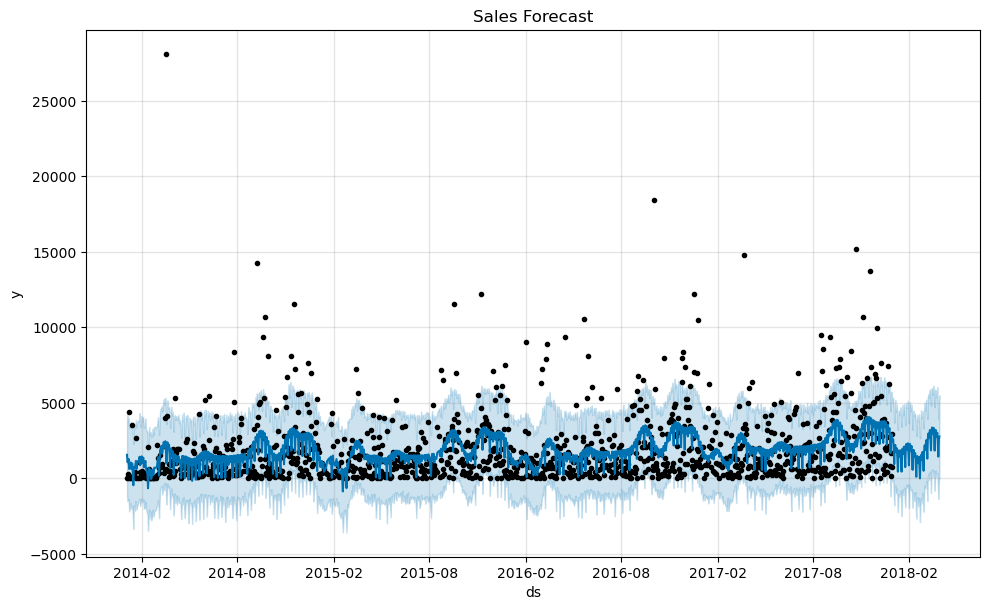

In [31]:
model.plot(forecast)
plt.title("Sales Forecast")
plt.show()

In [35]:
final_forecast = forecast[['ds', 'yhat']]
final_forecast.rename(columns={'yhat':'Forecasted_Sales'}, inplace=True)
actual = daily_sales.rename(columns={'y':'Actual_Sales'})
merged = pd.merge(actual, final_forecast, on='ds', how='left')

C:\Users\User\AppData\Local\Temp\ipykernel_15984\1807685165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_forecast.rename(columns={'yhat':'Forecasted_Sales'}, inplace=True)


In [34]:
merged.to_csv("sales_forecast.csv", index=False)
category_sales.to_csv("category_sales.csv", index=False)
monthly_sales.to_csv("monthly_sales.csv", index=False)

In [36]:
import os
os.getcwd()

'C:\\Users\\User'